In [4]:
import os
import sys
from collections import Counter
from os.path import join as p_join

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus  # you can install pydotplus with: pip install pydotplus
from IPython.display import Image
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

%matplotlib inline

In [17]:
### Import data
# Always good to set a seed for reproducibility
SEED = 222
np.random.seed(SEED)

df =pd.read_csv(p_join(sys.path[0],'data','input.csv'))

### Training and test set
from sklearn.model_selection import train_test_split


def get_train_test(test_size=0.95):
    """Split Data into train and test sets."""
    y = 1 * (df.cand_pty_affiliation == "REP")
    X = df.drop(["cand_pty_affiliation"], axis=1)
    X = pd.get_dummies(X, sparse=True)
    X.drop(X.columns[X.std() == 0], axis=1, inplace=True)
    return train_test_split(X, y, test_size=test_size, random_state=SEED)


xtrain, xtest, ytrain, ytest = get_train_test()

# A look at the data
print("\nExample data:")
df.head()


Example data:


,cand_pty_affiliation,cand_office_st,cand_office,cand_status,rpt_tp,transaction_tp,entity_tp,state,classification,cycle,transaction_amt
0,REP,US,P,C,Q3,15,IND,NY,Engineer,2016.0,500.0
1,DEM,US,P,C,M5,15E,IND,OR,Math-Stat,2016.0,50.0
2,DEM,US,P,C,M3,15,IND,TX,Scientist,2008.0,250.0
3,DEM,US,P,C,Q2,15E,IND,IN,Math-Stat,2016.0,250.0
4,REP,US,P,C,12G,15,IND,MA,Engineer,2016.0,184.0


In [18]:
set(df.classification)

{'Engineer', 'Math-Stat', 'Scientist'}

In [32]:
X = df.drop(["cand_pty_affiliation"], axis=1)
pd.get_dummies(X, sparse=True)

,cycle,transaction_amt,cand_office_st_AK,cand_office_st_AL,cand_office_st_AR,cand_office_st_AZ,cand_office_st_CA,cand_office_st_CO,cand_office_st_CT,cand_office_st_DC,...,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY,state_ZZ,classification_Engineer,classification_Math-Stat,classification_Scientist
0,2016.0,500.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2016.0,50.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2008.0,250.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2016.0,250.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2016.0,184.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,2008.0,200.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,2012.0,500.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,2008.0,250.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,2008.0,1000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,2016.0,100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


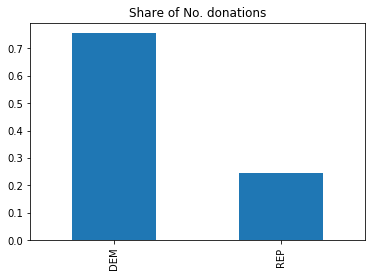

In [22]:
df.cand_pty_affiliation.value_counts(normalize=True).plot(
    kind="bar", title="Share of No. donations")
plt.show()

In [23]:
def print_graph(clf, feature_names):
    """Print decision tree."""
    graph = export_graphviz(
        clf,
        label="root",
        proportion=True,
        impurity=False,
        out_file=None,
        feature_names=feature_names,
        class_names={0: "D", 1: "R"},
        filled=True,
        rounded=True
    )
    graph = pydotplus.graph_from_dot_data(graph)
    return Image(graph.create_png())

In [30]:
Counter(t2.predict_proba(xtest)[:,1])

Counter({0.26545454545454544: 4810,
         0.0: 18593,
         0.19090909090909092: 8175,
         0.5455882352941176: 13958,
         0.08301647655259822: 30905,
         0.3813813813813814: 5827,
         0.8648648648648649: 1131,
         0.5806451612903226: 512,
         0.4166666666666667: 1832,
         0.6495726495726496: 2091,
         0.4444444444444444: 159,
         0.48: 2443,
         1.0: 408,
         0.35: 367,
         0.9473684210526315: 297,
         0.07692307692307693: 616,
         0.8888888888888888: 126,
         0.6666666666666666: 1515,
         0.16666666666666666: 120,
         0.6842105263157895: 430,
         0.8: 127,
         0.5: 202,
         0.08333333333333333: 242,
         0.14285714285714285: 114})

Decision tree ROC-AUC score: 0.672


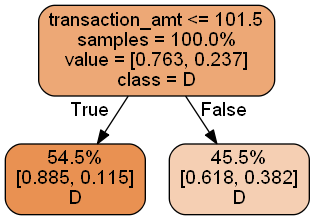

In [25]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

t1 = DecisionTreeClassifier(max_depth=1, random_state=SEED)
t1.fit(xtrain, ytrain)
p = t1.predict_proba(xtest)[:, 1]

print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))
print_graph(t1, xtrain.columns)

Decision tree ROC-AUC score: 0.825


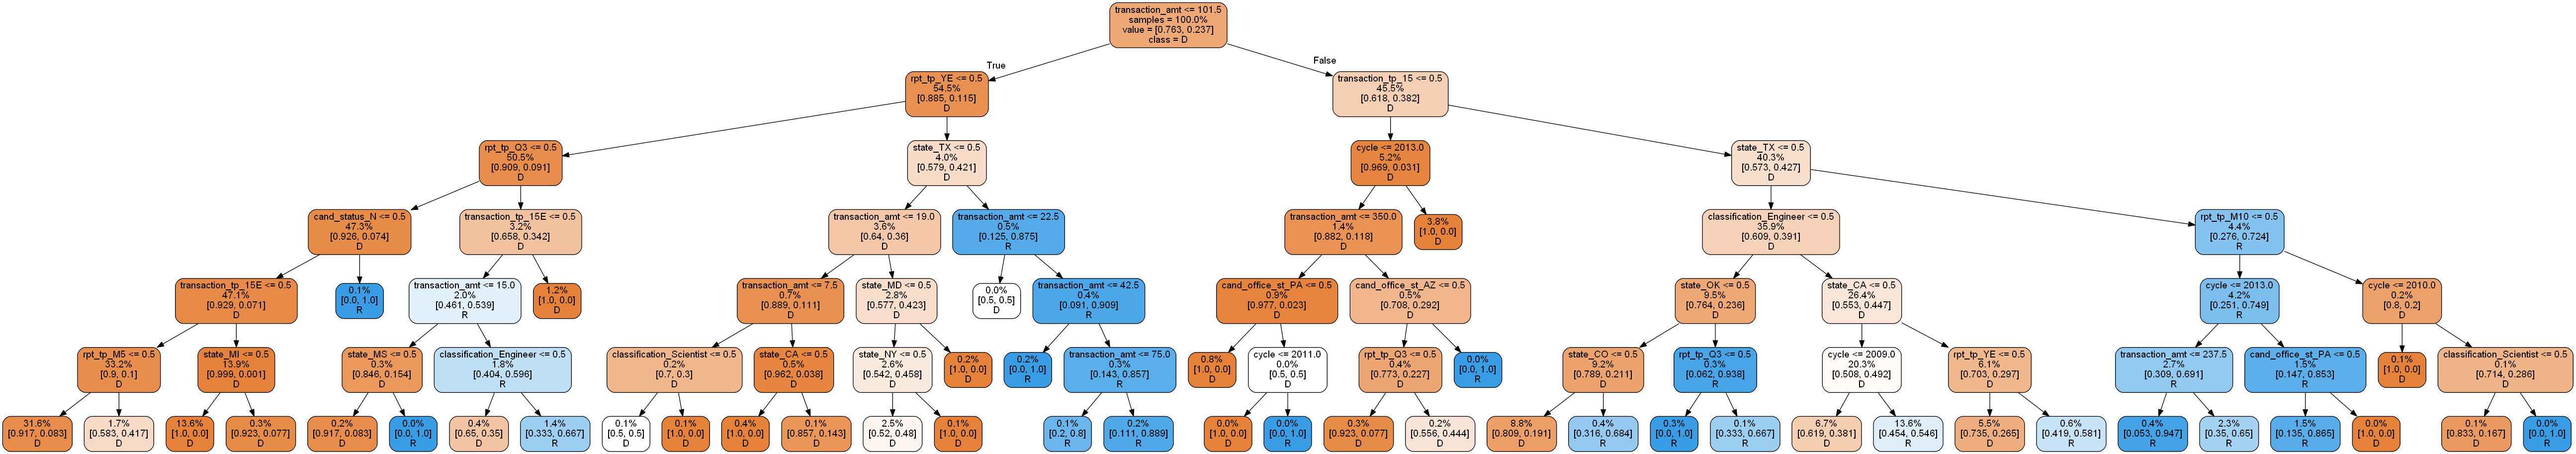

In [29]:
t2 = DecisionTreeClassifier(max_depth=6, random_state=1)
t2.fit(xtrain, ytrain)
p = t2.predict_proba(xtest)[:, 1]

print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))
print_graph(t2, xtrain.columns)

Decision tree ROC-AUC score: 0.740


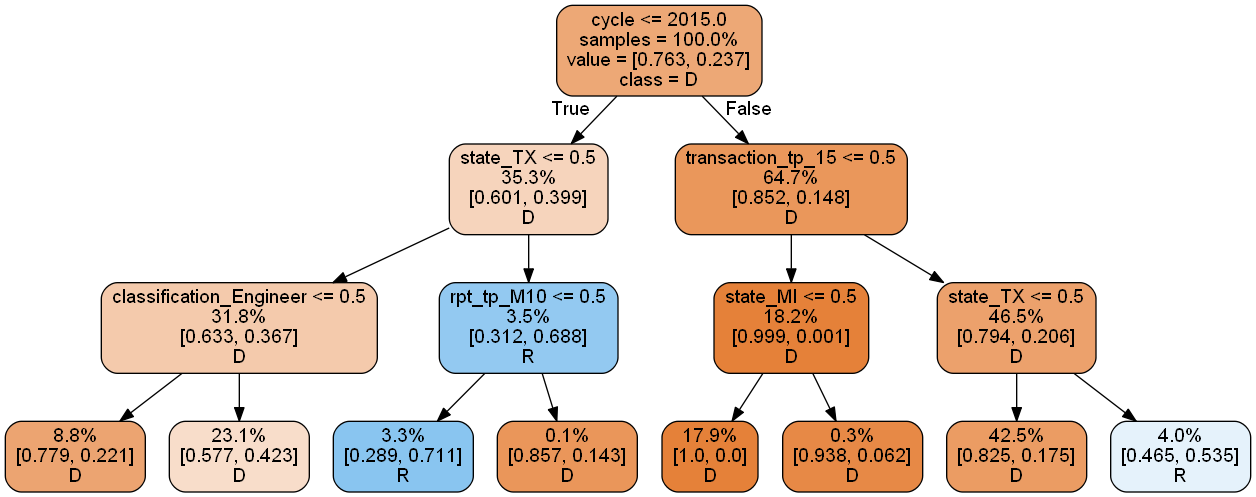

In [33]:
drop = ["transaction_amt"]

xtrain_slim = xtrain.drop(drop, 1)
xtest_slim = xtest.drop(drop, 1)

t3 = DecisionTreeClassifier(max_depth=3, random_state=SEED)
t3.fit(xtrain_slim, ytrain)
p = t3.predict_proba(xtest_slim)[:, 1]


print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))
print_graph(t3, xtrain_slim.columns)